In [1]:
# Mokhtarian & Mackworth (1992)
#https://www.cs.ubc.ca/~mack/Publications/IEEE-PAMI92.pdf 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from scipy.ndimage import gaussian_filter1d

from bin.morphology.transforms import edge_transform, smooth
from bin.adj_image_array import invert
from bin.edge_loop import EdgeLoop

In [9]:
def delta_t_array(arr):
    dx, dy = delta_array(arr).transpose()
    ddx, ddy = delta_2_array(arr).transpose()
    
    return ((dx*ddy - dy*ddx) / (dx**2 + dy**2)**(3/2) * np.array([-dy, dx])).transpose()

In [4]:
def delta_array(arr):
    return arr - np.roll(arr, 1, 0)

In [5]:
def delta_2_array(arr):
    return np.roll(arr, -1, 0) - 2*arr + np.roll(arr, 1, 0)

In [26]:
def normal_array(arr):
    dx, dy = delta_array(arr).transpose()
    return np.array([-dy, dx]).transpose()

In [21]:
def curve_array(arr):
    dx, dy = delta_array(arr).transpose()
    ddx, ddy = delta_2_array(arr).transpose()
    
    return (dx*ddy - dy*ddx) / (dx**2 + dy**2)**(3/2)

In [3]:
im = np.pad(invert(np.array(Image.open('lib/silhouettes/afghanistan-silhouette.bmp').convert('L'))), 1)

edge = np.array(EdgeLoop(im).edge_loop())

In [10]:
dt = delta_t_array(edge)
dt.shape

(10377, 2)

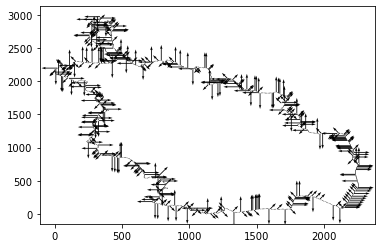

In [12]:
plt.figure()
plt.quiver(*edge[::10].transpose(), *(-dt)[::10].transpose())

In [40]:
im2 = np.pad(invert(np.array(Image.open('lib/polygon_test_shapes/test2.bmp').convert('L'))), 1)
im2 = smooth(im2, 3)
edge2 = np.array(EdgeLoop(im2).edge_loop())

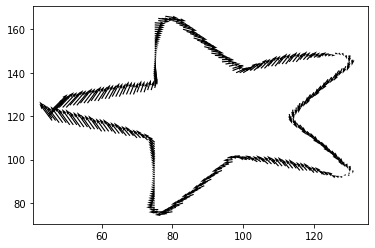

In [41]:
dt2= delta_t_array(edge2)

plt.figure()
plt.quiver(*edge2.transpose(), *gaussian_filter1d(dt2, 10, axis=0).transpose())

In [43]:
n2 = normal_array(edge2)
k2 = curve_array(edge2)
n2.shape, k2.shape

((304, 2), (304,))

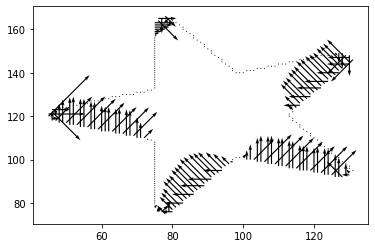

In [44]:
plt.figure()
plt.quiver(*edge2.transpose(), *np.where(gaussian_filter1d(k2, 3)[:, None] < 0, (gaussian_filter1d(k2, 3)[:, None] * n2), 0).transpose())

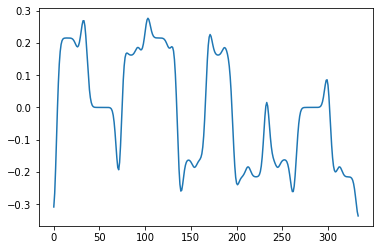

In [35]:
plt.figure()
plt.plot(gaussian_filter1d(k2, 3))